# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [26]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

In [27]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [28]:
# YOUR CODE HERE

adultDataSet_filename = os.path.join(os.getcwd(), "data", "adultData.csv")
df = pd.read_csv(adultDataSet_filename)

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

### Inspecting Data

In [29]:
# Basic Statistics of Numerical Columns
print(df.describe())

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32399.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.589216  1.897784e+05      10.080679    615.907773     87.303830   
std       13.647862  1.055500e+05       2.572720   2420.191974    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  14084.000000   4356.000000   

       hours-per-week  
count    32236.000000  
mean        40.450428  
std         12.353748  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [30]:
# column data types
print(df.dtypes)

age               float64
workclass          object
fnlwgt              int64
education          object
education-num       int64
marital-status     object
occupation         object
relationship       object
race               object
sex_selfID         object
capital-gain        int64
capital-loss        int64
hours-per-week    float64
native-country     object
income_binary      object
dtype: object


In [31]:
# missing values
print(df.isnull().sum())

age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64


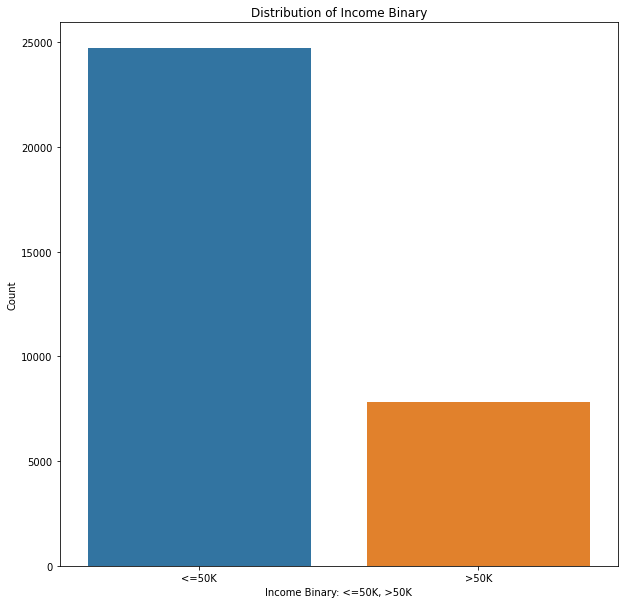

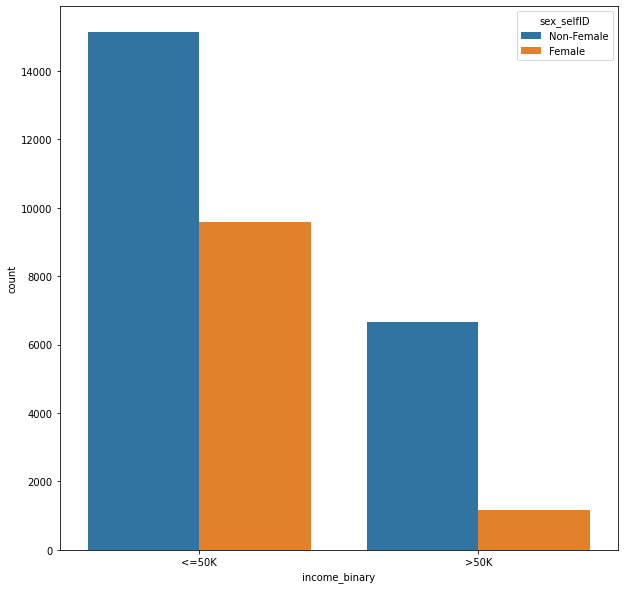

In [32]:
# distribution of "income_binary" (target variable)
plt.figure(figsize=(10, 10))
sns.countplot(x='income_binary', data=df)
plt.title('Distribution of Income Binary') #wanted to show if there was a class imbalance with the target variable
plt.xlabel('Income Binary: <=50K, >50K')
plt.ylabel('Count')
plt.show()

# distribution of "income_binary" (target variable) with respect to sex
plt.figure(figsize=(10,10))
sns.countplot(x='income_binary',hue='sex_selfID',data=df)
plt.show()

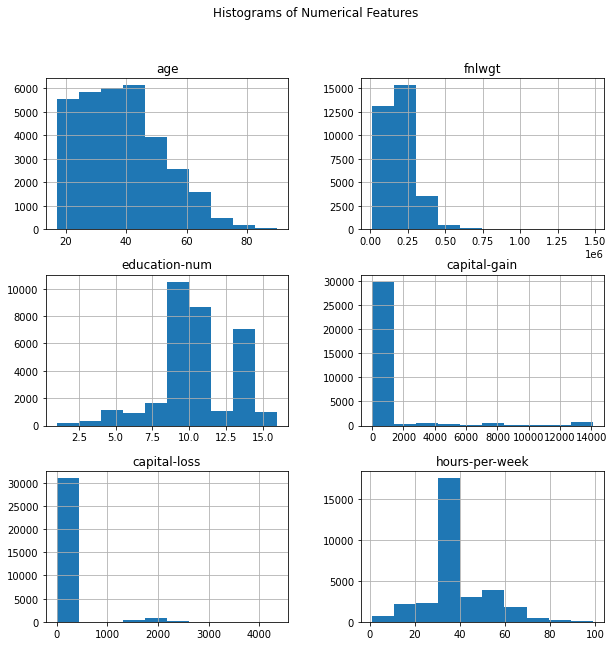

In [33]:
# histograms of numerical columns
numerical_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
df[numerical_columns].hist(figsize=(10, 10)) #wanted to show selected columns together
plt.suptitle('Histograms of Numerical Features') #because title at the top of a collection of histogram plots (selected columns)
plt.show()

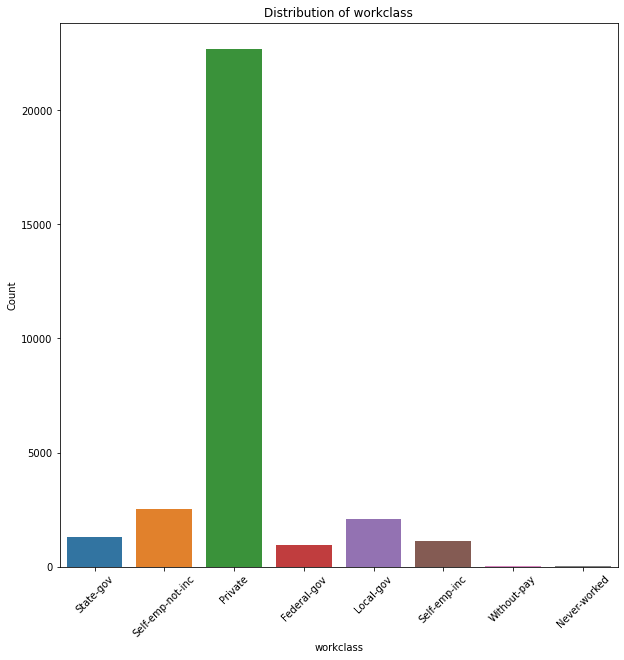

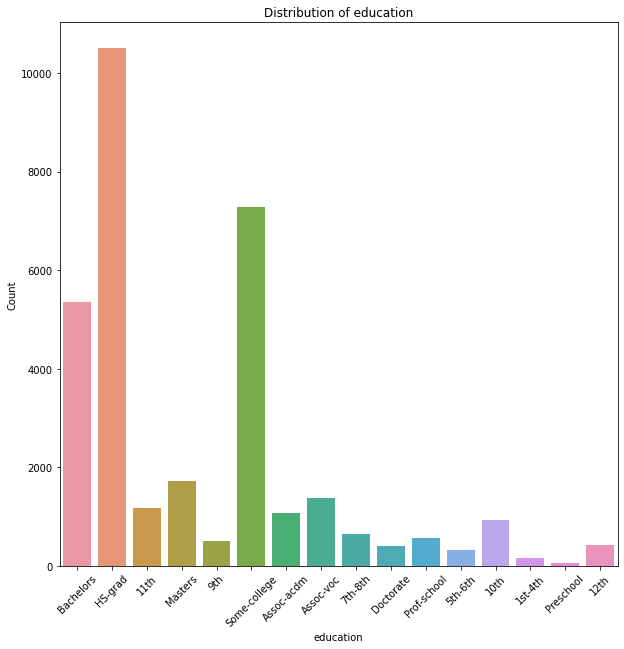

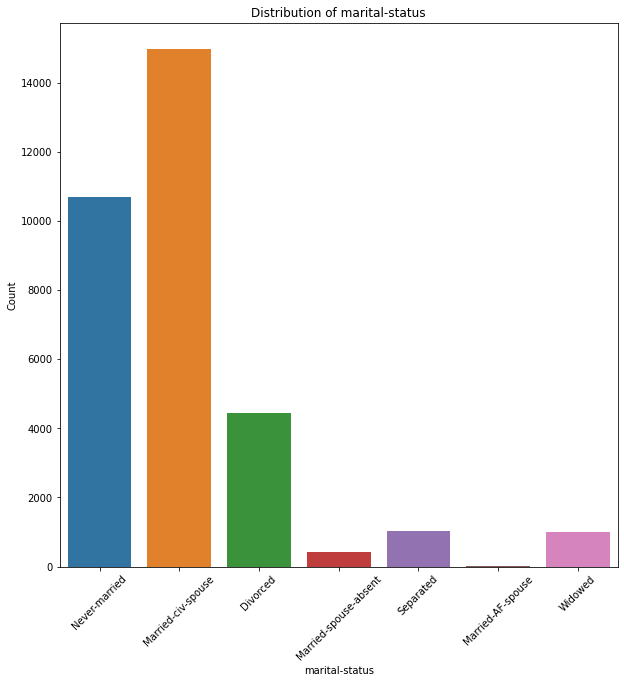

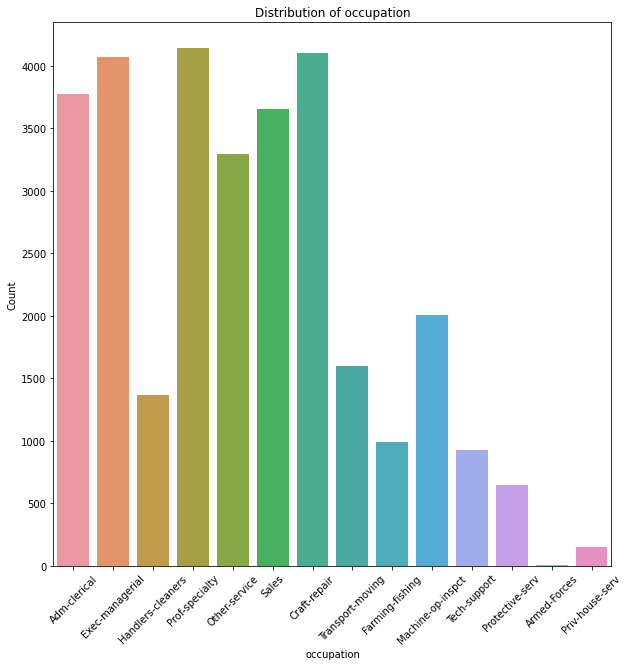

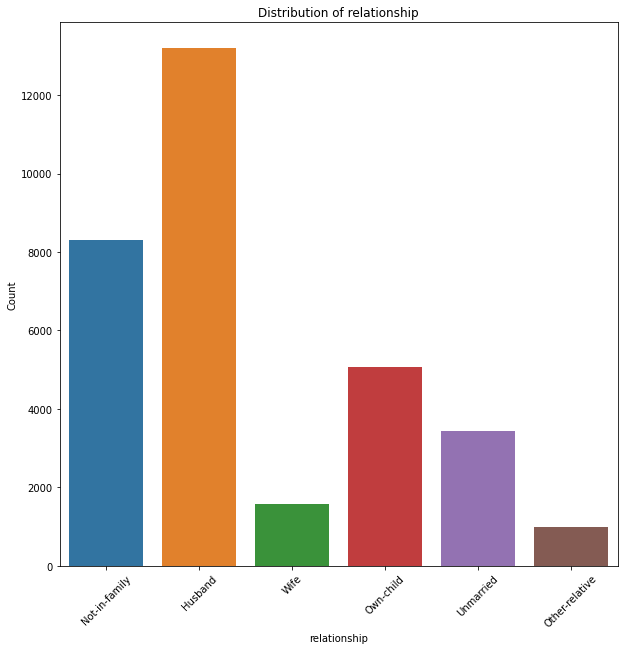

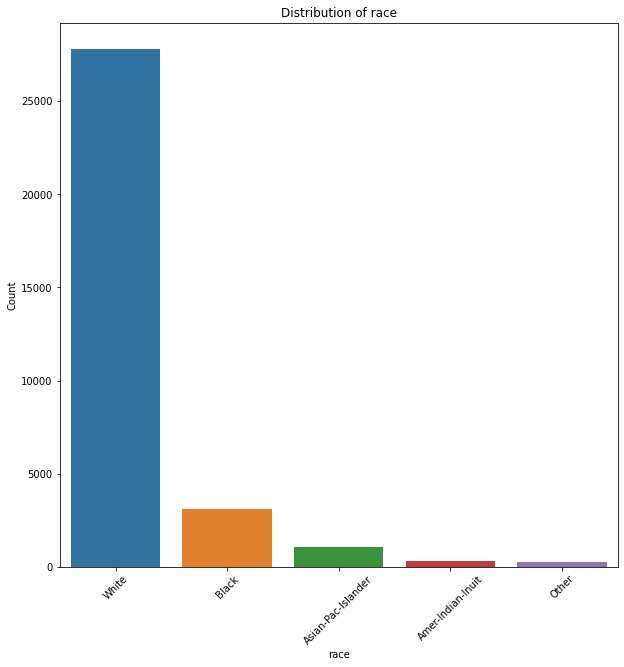

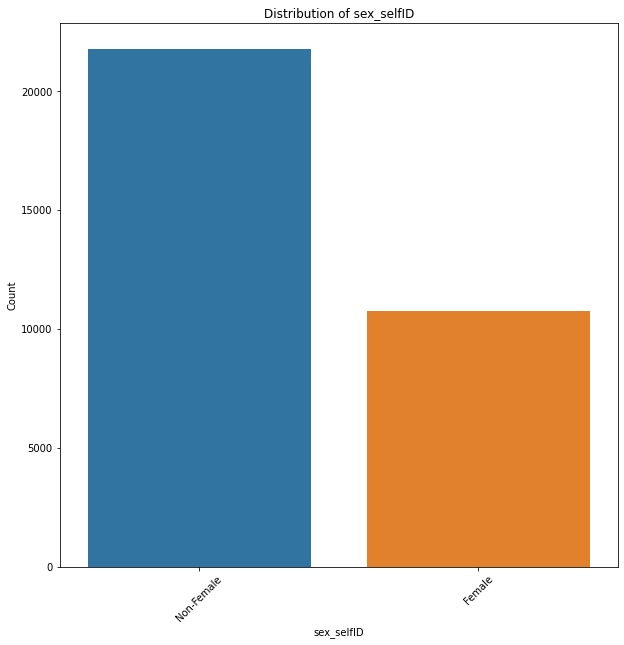

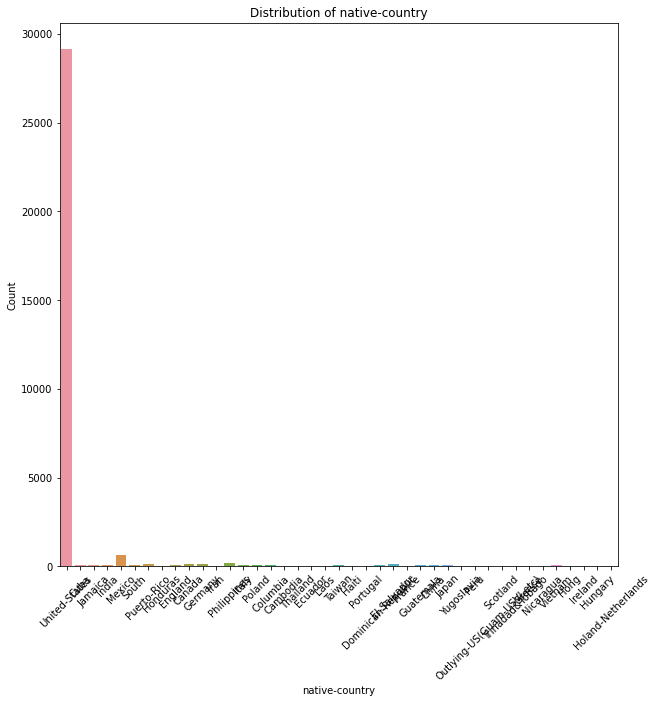

In [34]:
# bar plots of categorical columns
categorical_columns= ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country']
for column in categorical_columns:
    plt.figure(figsize=(10, 10))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
    
#note about 'occupation':
#   adm-clerical - administrative and clerical jobs
#   prof-specialty - professional speciality groups
    
#note about 'marital_status':
#   Married-civ-spouse = civilian spouse
#   Married-AF-spouse = spouse in the Armed Forces

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

### Preparing Data for Model-building

In [35]:
#drop rows with null values
df = df.dropna()

In [36]:
#hot encode workclass

# NOT self employed: get all examples (rows) in which the workclass feature (column) is not self-employed
columns_not_self_employed = ~(df['workclass'] == 'Self-emp-not-inc') & ~(df['workclass'] == 'Self-emp-inc') #he code uses the Pandas logical operator ~ for NOT
df['workclass'] = np.where(columns_not_self_employed, 'Not-self-emp', df['workclass']) # Use np.where() to change all of the workclass values that fulfill the specified condition to Not-self-emp

# self employed
columns_self_employed = (df['workclass'] == 'Self-emp-not-inc') | (df['workclass'] == 'Self-emp-inc')
df['workclass'] = np.where(columns_self_employed, 'Self-emp', df['workclass'])

#check
df['workclass'].unique()

array(['Not-self-emp', 'Self-emp'], dtype=object)

In [37]:
#order education

# ccreate a correctly ordered list of category names:
edu = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Some-college', 'Bachelors', 'Masters', 'Doctorate']

# use the pd.Categorical method to reassign the values of this column as a new type with awareness of the order:
df['education'] = pd.Categorical(df['education'], ordered=True, categories=edu)

In [38]:
# split the data into features (X) and target labels (y)
X = df.drop("income_binary", axis=1)
y = df["income_binary"]

In [39]:
#hot incode all of the categorical columns
X = pd.get_dummies(X, columns=categorical_columns, drop_first=True)

In [40]:
# split labeled examples into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

### Model Building

In [41]:
# parameter grid for GridSearchCV
param_grid = {'C': [10 ** i for i in range(-10, 10)]}

In [42]:
# initialize Logistic Regression model
lr_model = LogisticRegression()

In [43]:
# GridSearchCV
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='neg_log_loss', n_jobs=-1)

In [44]:
# fit GridSearchCV to  training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001,
                               0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000,
                               100000, 1000000, 10000000, 100000000,
                               1000000000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
         

In [45]:
# best hyperparameters from GridSearchCV
best_c = grid_search.best_params_['C']

In [46]:
# train + evaluate Logistic Regression model with best C
best_lr_model = LogisticRegression(C=best_c)
best_lr_model.fit(X_train, y_train)

LogisticRegression(C=100000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
# make predictions on test data
y_pred = best_lr_model.predict(X_test)
y_pred_proba = best_lr_model.predict_proba(X_test)

In [48]:
# calculate log loss and accuracy and ouput which C was best
logloss = log_loss(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print("Best C:", best_c)
print("Log Loss:", logloss)
print("Accuracy:", accuracy)

Best C: 100000
Log Loss: 0.5186846155185864
Accuracy: 0.7942793045429052
